<a href="https://colab.research.google.com/github/joooseb/Proyecto-Minero/blob/main/Curva_Tonelaje_Ley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.float_format', lambda x: "%.3f" % x)
%matplotlib inline

In [216]:
g3 = pd.read_csv('/content/drive/MyDrive/Curva Tonelaje Ley/prm3.csv')
g5 = pd.read_csv('/content/drive/MyDrive/Curva Tonelaje Ley/ProyectoBBB.csv')

In [217]:
g3

,centroid_x,centroid_y,centroid_z,dim_x,dim_y,dim_z,volume,cu,veta,mine,au,densidad,tonelaje,ton_cu,ton_au,ley_aueqv,ley_cueqv,ton_cueqv,ton_aueqv,tonpr1,tonpr2,Tonelaje3,Tonelaje4
0,78361.000,4695.000,-273.000,5.000,5.000,5.000,125.000,0.409,3.000,100.000,0.363,2.540,2.540,1.038,0.923,1.433,0.548,1.391,3.639,0.760,1.961,1.074,2.810
1,78381.000,4700.000,-273.000,5.000,5.000,5.000,125.000,0.409,3.000,100.000,0.364,2.540,2.540,1.039,0.924,1.434,0.548,1.392,3.642,0.761,1.963,1.076,2.814
2,78211.000,4655.000,-263.000,5.000,5.000,5.000,125.000,0.365,3.000,100.000,0.358,2.540,2.540,0.928,0.910,1.315,0.503,1.276,3.339,0.666,1.839,0.924,2.417
3,78216.000,4655.000,-263.000,5.000,5.000,5.000,125.000,0.364,3.000,100.000,0.357,2.540,15.240,5.554,5.447,1.311,0.501,7.636,19.975,3.970,11.000,5.512,14.418
4,78216.000,4660.000,-263.000,5.000,5.000,5.000,125.000,0.366,3.000,100.000,0.359,2.540,10.160,3.723,3.651,1.318,0.504,5.118,13.389,2.676,7.373,3.714,9.716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29736,78106.000,4680.000,182.000,5.000,5.000,5.000,125.000,0.821,2.000,100.000,0.743,2.540,2.540,2.086,1.888,2.891,1.105,2.807,7.343,3.115,3.973,4.391,11.486
29737,78116.000,4680.000,182.000,5.000,5.000,5.000,125.000,0.808,2.000,100.000,0.729,2.540,2.540,2.052,1.853,2.843,1.087,2.760,7.221,3.009,3.905,4.243,11.101
29738,78121.000,4680.000,182.000,5.000,5.000,5.000,125.000,0.799,2.000,100.000,0.720,2.540,5.080,4.058,3.657,2.810,1.074,5.456,14.273,5.874,7.715,8.287,21.677
29739,78321.000,4780.000,182.000,5.000,5.000,5.000,125.000,1.025,2.000,100.000,0.799,2.540,2.540,2.604,2.030,3.481,1.331,3.380,8.841,4.291,4.633,6.165,16.127


In [218]:
g3['ley_cueqv'].describe()

count   29741.000
mean        1.145
std         0.711
min         0.019
25%         0.593
50%         1.103
75%         1.560
max         4.178
Name: ley_cueqv, dtype: float64

In [219]:
dim_x = 5
dim_y = 5
dim_z = 5

In [220]:
lim_g3 = pd.DataFrame({'Li': np.arange(0, 5.2, 0.2)})

In [221]:
lim_g3

,Li
0,0.000
1,0.200
2,0.400
3,0.600
4,0.800
5,1.000
6,1.200
7,1.400
8,1.600
9,1.800


In [222]:
lim_g3['Ls'] = lim_g3['Li'] + 0.2

In [223]:
lim_g3

,Li,Ls
0,0.000,0.200
1,0.200,0.400
2,0.400,0.600
3,0.600,0.800
4,0.800,1.000
5,1.000,1.200
6,1.200,1.400
7,1.400,1.600
8,1.600,1.800
9,1.800,2.000


In [224]:
mc = lim_g3.loc[:, "Li":"Ls"]
lim_g3['Mc'] = mc.mean(axis=1)

In [225]:
lim_g3

,Li,Ls,Mc
0,0.000,0.200,0.100
1,0.200,0.400,0.300
2,0.400,0.600,0.500
3,0.600,0.800,0.700
4,0.800,1.000,0.900
5,1.000,1.200,1.100
6,1.200,1.400,1.300
7,1.400,1.600,1.500
8,1.600,1.800,1.700
9,1.800,2.000,1.900


In [226]:
for i,li  in enumerate(lim_g3['Li']):
  print(g3.loc[g3["ley_cueqv"] > li, "ton_cueqv"].sum())

6584693.487645289
6545488.645882893
6459618.212108775
6182769.894008401
5791309.104427064
5356645.269340719
4624309.292295551
3848364.1148365103
2934874.108027684
2459217.151225145
1876804.0276184543
1222772.8564078137
773085.3864746455
544106.7016827902
440397.5829287814
382846.408003206
242443.29276586734
94220.97403953614
68915.2638322459
58337.219533388095
8034.5100766188325
0.0
0.0
0.0
0.0
0.0


In [227]:
tonelaje = []
for i,li  in enumerate(lim_g3['Li']):
  tonelaje.append(g3.loc[g3["ley_cueqv"] > li, "ton_cueqv"].sum())
lim_g3["Tonelaje"] = tonelaje

In [228]:
lim_g3

,Li,Ls,Mc,Tonelaje
0,0.000,0.200,0.100,6584693.488
1,0.200,0.400,0.300,6545488.646
2,0.400,0.600,0.500,6459618.212
3,0.600,0.800,0.700,6182769.894
4,0.800,1.000,0.900,5791309.104
5,1.000,1.200,1.100,5356645.269
6,1.200,1.400,1.300,4624309.292
7,1.400,1.600,1.500,3848364.115
8,1.600,1.800,1.700,2934874.108
9,1.800,2.000,1.900,2459217.151


In [229]:
lim_g3["Tonelaje Mg"] = (- lim_g3["Tonelaje"].diff(periods=1).dropna().reset_index(drop=True))

In [230]:
lim_g3

,Li,Ls,Mc,Tonelaje,Tonelaje Mg
0,0.000,0.200,0.100,6584693.488,39204.842
1,0.200,0.400,0.300,6545488.646,85870.434
2,0.400,0.600,0.500,6459618.212,276848.318
3,0.600,0.800,0.700,6182769.894,391460.790
4,0.800,1.000,0.900,5791309.104,434663.835
5,1.000,1.200,1.100,5356645.269,732335.977
6,1.200,1.400,1.300,4624309.292,775945.177
7,1.400,1.600,1.500,3848364.115,913490.007
8,1.600,1.800,1.700,2934874.108,475656.957
9,1.800,2.000,1.900,2459217.151,582413.124


In [231]:
lim_g3.drop([21, 22, 23, 24, 25], axis=0, inplace=True)

In [232]:
lim_g3

,Li,Ls,Mc,Tonelaje,Tonelaje Mg
0,0.000,0.200,0.100,6584693.488,39204.842
1,0.200,0.400,0.300,6545488.646,85870.434
2,0.400,0.600,0.500,6459618.212,276848.318
3,0.600,0.800,0.700,6182769.894,391460.790
4,0.800,1.000,0.900,5791309.104,434663.835
5,1.000,1.200,1.100,5356645.269,732335.977
6,1.200,1.400,1.300,4624309.292,775945.177
7,1.400,1.600,1.500,3848364.115,913490.007
8,1.600,1.800,1.700,2934874.108,475656.957
9,1.800,2.000,1.900,2459217.151,582413.124


In [233]:
sum_ton_mg = lim_g3["Tonelaje Mg"].sum()
sum_ton_mg

6584693.487645288

In [234]:
ley_media = ((lim_g3["Mc"] * lim_g3["Tonelaje Mg"]).cumsum()) / sum_ton_mg

In [235]:
lim_g3["Ley Media"] = ley_media

In [236]:
lim_g3

,Li,Ls,Mc,Tonelaje,Tonelaje Mg,Ley Media
0,0.000,0.200,0.100,6584693.488,39204.842,0.001
1,0.200,0.400,0.300,6545488.646,85870.434,0.005
2,0.400,0.600,0.500,6459618.212,276848.318,0.026
3,0.600,0.800,0.700,6182769.894,391460.790,0.067
4,0.800,1.000,0.900,5791309.104,434663.835,0.127
5,1.000,1.200,1.100,5356645.269,732335.977,0.249
6,1.200,1.400,1.300,4624309.292,775945.177,0.402
7,1.400,1.600,1.500,3848364.115,913490.007,0.610
8,1.600,1.800,1.700,2934874.108,475656.957,0.733
9,1.800,2.000,1.900,2459217.151,582413.124,0.901


In [237]:
leyc = pd.DataFrame({'Ley de Corte': lim_g3["Li"]})

In [238]:
leyc

,Ley de Corte
0,0.000
1,0.200
2,0.400
3,0.600
4,0.800
5,1.000
6,1.200
7,1.400
8,1.600
9,1.800


In [239]:
leyc["Tonelaje (Mt)"] = lim_g3["Tonelaje"] / (10**6)

In [240]:
leyc

,Ley de Corte,Tonelaje (Mt)
0,0.000,6.585
1,0.200,6.545
2,0.400,6.460
3,0.600,6.183
4,0.800,5.791
5,1.000,5.357
6,1.200,4.624
7,1.400,3.848
8,1.600,2.935
9,1.800,2.459


In [241]:
leyc["Ley Media (%)"] = lim_g3["Ley Media"]

In [242]:
leyc

,Ley de Corte,Tonelaje (Mt),Ley Media (%)
0,0.000,6.585,0.001
1,0.200,6.545,0.005
2,0.400,6.460,0.026
3,0.600,6.183,0.067
4,0.800,5.791,0.127
5,1.000,5.357,0.249
6,1.200,4.624,0.402
7,1.400,3.848,0.610
8,1.600,2.935,0.733
9,1.800,2.459,0.901


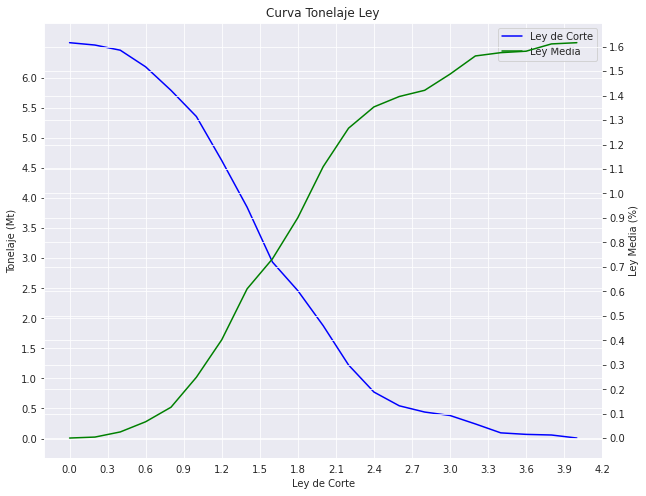

In [243]:
fig, ax = plt.subplots(figsize=(10, 8))
twin1 = ax.twinx()
p1, = ax.plot(leyc["Ley de Corte"], leyc["Tonelaje (Mt)"], color="blue", label="Ley de Corte")
p2, = twin1.plot(leyc["Ley de Corte"], leyc["Ley Media (%)"], color="green", label="Ley Media")

ax.set_title("Curva Tonelaje Ley")
ax.set_xlabel("Ley de Corte")
ax.set_ylabel("Tonelaje (Mt)")

ax.set_xticks(np.arange(0, 4.5, 0.3))
ax.set_yticks(np.arange(0, 6.5, 0.5))
twin1.set_yticks(np.arange(0, 1.7, 0.1))

twin1.set_ylabel("Ley Media (%)")

ax.legend(handles=[p1, p2])
plt.show()